In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(cancer['target_names'])
print(cancer['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
X = cancer['data']
y = cancer['target']
print(X.shape,y.shape)

(569, 30) (569,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(426, 30) (426,)
(143, 30) (143,)


In [30]:
logreg = LogisticRegression().fit(X_train, y_train)
print('testing score: {:.4f}'.format(logreg.score(X_test, y_test)),
      'training score: {:.4f}'.format(logreg.score(X_train, y_train)))
print(logreg.coef_)

testing score: 0.9580 training score: 0.9601
[[ 1.72208836  0.08980729  0.10601907 -0.00713602 -0.12840687 -0.33348383
  -0.49934223 -0.26507391 -0.26760279 -0.02149347  0.03647195  0.98648986
   0.11708964 -0.10871657 -0.00796623  0.01056614 -0.02918073 -0.02818196
  -0.03431226  0.00856859  1.35826783 -0.2890369  -0.2498434  -0.020123
  -0.21696067 -1.0274176  -1.44790096 -0.53376449 -0.64854631 -0.10912892]]


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
# try set the parameters to 100 --> less generalizing
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('testing score: {:.4f}'.format(logreg100.score(X_test, y_test)),
      'training score: {:.4f}'.format(logreg100.score(X_train, y_train)))

testing score: 0.9650 training score: 0.9648


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# try set the parameters to 0.01 --> more generalizing
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('testing score: {:.4f}'.format(logreg001.score(X_test, y_test)),
      'training score: {:.4f}'.format(logreg001.score(X_train, y_train)))

testing score: 0.9301 training score: 0.9343


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


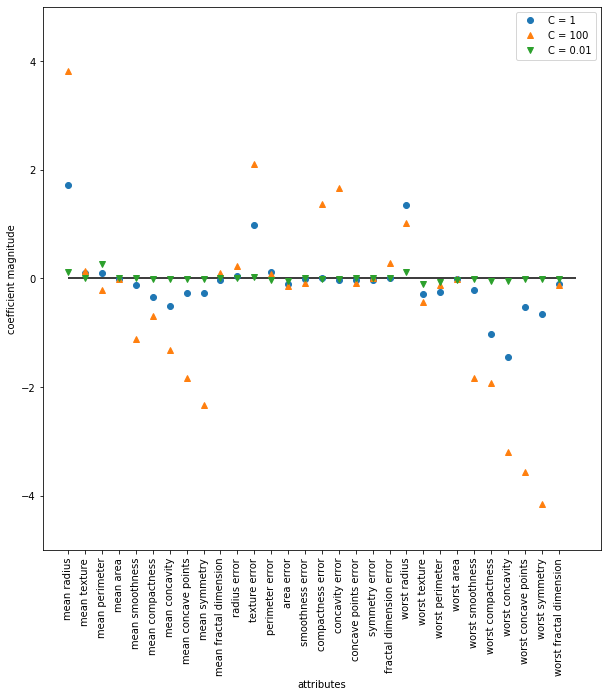

In [35]:
# compare three parameters 
plt.figure(figsize=(10,10))
plt.plot(logreg.coef_.T,'o',label = 'C = 1')
plt.plot(logreg100.coef_.T,'^',label = 'C = 100')
plt.plot(logreg001.coef_.T,'v',label = 'C = 0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation = 90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('attributes')
plt.ylabel('coefficient magnitude')
plt.legend()

We can also tweak parameter `Penalty = 'L1' or 'L2'`